In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [5]:
df = pd.read_csv('player_stats_w_pos.csv', header=0, index_col=0)
df.head()

,element,name,position_name,team_name,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,1,Mesut Özil,Midfielder,Arsenal,2,8,0,False,2020-09-12T11:30:00Z,0,...,0,0.0,0.0,0.0,0.0,70,0,76656,0,0
1,1,Mesut Özil,Midfielder,Arsenal,9,19,0,True,2020-09-19T19:00:00Z,2,...,0,0.0,0.0,0.0,0.0,69,-16828,68335,995,17823
2,1,Mesut Özil,Midfielder,Arsenal,23,11,0,False,2020-09-28T19:00:00Z,3,...,0,0.0,0.0,0.0,0.0,69,-11451,59793,675,12126
3,1,Mesut Özil,Midfielder,Arsenal,29,15,0,True,2020-10-04T13:00:00Z,2,...,0,0.0,0.0,0.0,0.0,68,-5324,56403,647,5971
4,1,Mesut Özil,Midfielder,Arsenal,44,12,0,False,2020-10-17T16:30:00Z,1,...,0,0.0,0.0,0.0,0.0,68,-4224,53689,616,4840


## Visualize player stats

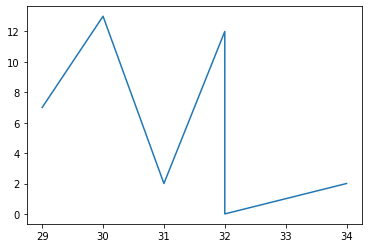

In [9]:

player = 'Harry Kane'
weeks = 6

#gameweeks_x = df['gameweek'].unique()

#gameweeks_x = sorted(gameweeks_x.tolist(), reverse=True)
latest_round = df['round'].max()

def filter_by_weeks(weeks):
    round_list = []
    latest_round = df['round'].max()
    round_list.append(latest_round)
    for i in range(weeks-1):
        latest_round -=1
        round_list.append(latest_round)
    return round_list


filtered_df = df[df['round'].astype('int64').isin(filter_by_weeks(weeks))]

results = filtered_df[filtered_df['name'] == player]


plt.plot(results['round'], results['total_points'])

## How is my goalkeeper doing?



## Moving average of total_points

### SO WHO IS DOING WELL???? 
#### best performers by position

In [10]:
weeks = 3 #int(input('How many weeks back?: '))
position = 'Defender'
filtered_df = df[(df['round'].astype('int64').isin(filter_by_weeks(weeks)))]
filtered_df = filtered_df[filtered_df['position_name'] == position]
#which goalie has hightest total poiints
total_points_by_pos = filtered_df.groupby(['element', 'name', 'team_name'])['total_points'].sum()
tp_by_points = total_points_by_pos[total_points_by_pos > 10]
tp_by_points = tp_by_points.sort_values(ascending=False)
tp_by_points
#['Midfielder' 'Defender' 'Forward' 'Goalkeeper']


element  name                  team_name
219      Jonny Evans           Leicester    30
498      Timothy Castagne      Leicester    22
116      Andreas Christensen   Chelsea      20
549      Diego Llorente        Leeds        19
232      Benjamin Chilwell     Chelsea      18
389      Serge Aurier          Spurs        17
62       Lewis Dunk            Brighton     16
109      Antonio Rüdiger       Chelsea      15
66       Adam Webster          Brighton     14
67       Joël Veltman          Brighton     14
123      Reece James           Chelsea      14
155      Lucas Digne           Everton      14
546      Nélson Cabral Semedo  Wolves       14
490      Thiago Thiago         Chelsea      14
558      Vladimir Coufal       West Ham     13
542      Sergio Reguilón       Spurs        12
61       Dan Burn              Brighton     12
274      Benjamin Mendy        Man City     12
152      Seamus Coleman        Everton      12
81       James Tarkowski       Burnley      12
566      Ben Godfre

In [11]:
def filter_by_weeks(weeks):
    round_list = []
    latest_round = df['round'].max()
    round_list.append(latest_round)
    for i in range(weeks-1):
        latest_round -=1
        round_list.append(latest_round)
    return round_list


df_sm = pd.read_csv('player_stats_sm.csv', index_col=0)
df_sm.head()

,element,name,team_name,position_name,round,total_points
0,1,Mesut Özil,Arsenal,Midfielder,1,0
1,1,Mesut Özil,Arsenal,Midfielder,2,0
2,1,Mesut Özil,Arsenal,Midfielder,3,0
3,1,Mesut Özil,Arsenal,Midfielder,4,0
4,1,Mesut Özil,Arsenal,Midfielder,5,0


In [18]:
weeks = 3 #int(input('How many weeks back?: '))
position = 'Midfielder'


filtered_df = df_sm[(df_sm['round'].astype(
    'int64').isin(filter_by_weeks(weeks)))]
filtered_df = filtered_df[filtered_df['position_name'] == position]
# which goalie has hightest total poiints
total_points_by_pos = filtered_df.groupby(['element','name', 'team_name'])[
    'total_points'].sum()
tp_by_points = total_points_by_pos[total_points_by_pos > 10]
tp_by_points = tp_by_points.sort_values(ascending=False)
tp_by_points = tp_by_points.to_frame().reset_index().set_index('element')
tp_by_points.head(10)

,name,team_name,total_points
element,,,
543,Gareth Bale,Spurs,30
390,Heung-Min Son,Spurs,24
150,Gylfi Sigurdsson,Everton,20
500,Kai Havertz,Chelsea,19
315,Mason Greenwood,Man Utd,18
45,Anwar El Ghazi,Aston Villa,16
89,Ashley Westwood,Burnley,16
370,James Ward-Prowse,Southampton,15
100,Dwight McNeil,Burnley,15


In [19]:
top_ids = tp_by_points.index.to_list()
top_ids = top_ids[0:7]

df_top = filtered_df[filtered_df['element'].isin(top_ids)]
#sns.lineplot(x='round', y='total_points', hue='name', data=df_top)

fig = px.line(df_top, x='round', y='total_points', color='name', hover_name='name', title='Performance of top players by week')
fig.show()

In [74]:
to_chart = tp_by_points[0:7]

#sns.lineplot(x='round', y ='total_points', data=to_chart)
plt.show()

## Team stats

In [23]:
weeks = 4
filtered_df = df[df['round'].astype('int64').isin(filter_by_weeks(weeks))]

goals_conceded = filtered_df.groupby('team_name', as_index=False)['goals_conceded'].sum().sort_values(['goals_conceded'])
print(goals_conceded)

         team_name  goals_conceded
2         Brighton              11
4          Chelsea              11
0          Arsenal              22
12         Man Utd              22
11        Man City              33
10       Liverpool              33
6          Everton              44
7           Fulham              44
8            Leeds              44
9        Leicester              55
19          Wolves              55
13       Newcastle              66
15     Southampton              66
16           Spurs              66
17       West Brom              66
3          Burnley              77
1      Aston Villa              77
18        West Ham              77
5   Crystal Palace              88
14   Sheffield Utd              88


In [27]:
#filtered_df.columns
goals_scored = filtered_df.groupby('team_name', as_index=False)['goals_scored'].sum()
print(goals_scored)

         team_name  goals_scored
0          Arsenal             6
1      Aston Villa             6
2         Brighton             2
3          Burnley             7
4          Chelsea             7
5   Crystal Palace             2
6          Everton             3
7           Fulham             1
8            Leeds             3
9        Leicester             8
10       Liverpool             4
11        Man City             5
12         Man Utd             6
13       Newcastle             5
14   Sheffield Utd             1
15     Southampton             2
16           Spurs             9
17       West Brom             5
18        West Ham             7
19          Wolves             3
